In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv('/content/amostra.csv')
df.head()

,Unnamed: 0,match_id,date,timestamp,status,championship,country,championship_logo,country_logo,season,round,home_id,home_name,home_logo,home_winner,away_id,away_name,away_logo,away_winner,winner,goal_home,goal_away,goal_tot,ht_home,ht_away,ht_tot,ft_home,ft_away,ft_tot,et_home,et_away,pen_home,pen_away
0,0,116578,2019-04-25,1556150400,Match Finished,Ascenso MX,Mexico,/football/leagues/263.png,/flags/mx.svg,2018,Clausura - Semi-finals,2311,Venados FC,/football/teams/2311.png,0,2314,Atletico San Luis,/football/teams/2314.png,0,0,1,1,2,1,1,2,0,0,0,NaN,NaN,NaN,NaN
1,2,128260,2019-04-25,1556150400,Match Finished,Major League Soccer,USA,/football/leagues/253.png,/flags/us.svg,2019,Regular Season - 10,1612,Minnesota Stars FC,/football/teams/1612.png,0,1605,Los Angeles Galaxy,/football/teams/1605.png,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,129097,2019-04-25,1556150400,Match Finished,Liga Nacional,Guatemala,/football/leagues/339.png,/flags/gt.svg,2018,Clausura - 19,3658,Comunicaciones,/football/teams/3658.png,1,3657,Cobán Imperial,/football/teams/3657.png,0,1,3,1,4,0,0,0,3,1,4,NaN,NaN,NaN,NaN
3,4,129098,2019-04-25,1556150400,Match Finished,Liga Nacional,Guatemala,/football/leagues/339.png,/flags/gt.svg,2018,Clausura - 19,3659,Deportivo Chiantla,/football/teams/3659.png,0,3665,Municipal,/football/teams/3665.png,2,2,1,6,7,1,4,5,0,2,2,NaN,NaN,NaN,NaN
4,5,154652,2019-04-25,1556150400,Match Finished,USL Championship,USA,/football/leagues/255.png,/flags/us.svg,2019,Regular Season - 13,4022,Tulsa Roughnecks,/football/teams/4022.png,1,3992,Colorado Springs,/football/teams/3992.png,0,1,2,0,2,0,0,0,2,0,2,NaN,NaN,NaN,NaN


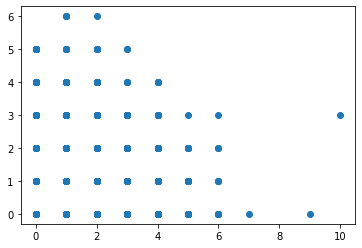

In [ ]:
plt.scatter(df['goal_home'],df['goal_away'])

In [ ]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.fit(df[['goal_home','goal_away']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_predicted=km.fit_predict(df[['goal_home','goal_away']])
y_predicted

array([0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1,
       1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1,

In [ ]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,match_id,date,timestamp,status,championship,country,championship_logo,country_logo,season,round,home_id,home_name,home_logo,home_winner,away_id,away_name,away_logo,away_winner,winner,goal_home,goal_away,goal_tot,ht_home,ht_away,ht_tot,ft_home,ft_away,ft_tot,et_home,et_away,pen_home,pen_away,cluster
0,0,116578,2019-04-25,1556150400,Match Finished,Ascenso MX,Mexico,/football/leagues/263.png,/flags/mx.svg,2018,Clausura - Semi-finals,2311,Venados FC,/football/teams/2311.png,0,2314,Atletico San Luis,/football/teams/2314.png,0,0,1,1,2,1,1,2,0,0,0,NaN,NaN,NaN,NaN,0
1,2,128260,2019-04-25,1556150400,Match Finished,Major League Soccer,USA,/football/leagues/253.png,/flags/us.svg,2019,Regular Season - 10,1612,Minnesota Stars FC,/football/teams/1612.png,0,1605,Los Angeles Galaxy,/football/teams/1605.png,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,0
2,3,129097,2019-04-25,1556150400,Match Finished,Liga Nacional,Guatemala,/football/leagues/339.png,/flags/gt.svg,2018,Clausura - 19,3658,Comunicaciones,/football/teams/3658.png,1,3657,Cobán Imperial,/football/teams/3657.png,0,1,3,1,4,0,0,0,3,1,4,NaN,NaN,NaN,NaN,2
3,4,129098,2019-04-25,1556150400,Match Finished,Liga Nacional,Guatemala,/football/leagues/339.png,/flags/gt.svg,2018,Clausura - 19,3659,Deportivo Chiantla,/football/teams/3659.png,0,3665,Municipal,/football/teams/3665.png,2,2,1,6,7,1,4,5,0,2,2,NaN,NaN,NaN,NaN,1
4,5,154652,2019-04-25,1556150400,Match Finished,USL Championship,USA,/football/leagues/255.png,/flags/us.svg,2019,Regular Season - 13,4022,Tulsa Roughnecks,/football/teams/4022.png,1,3992,Colorado Springs,/football/teams/3992.png,0,1,2,0,2,0,0,0,2,0,2,NaN,NaN,NaN,NaN,0


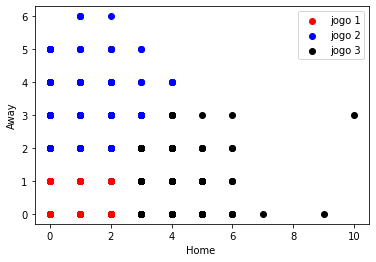

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


plt.scatter(df1.goal_home,df1['goal_away'], color='red')
plt.scatter(df2.goal_home,df2['goal_away'], color='blue')
plt.scatter(df3.goal_home,df3['goal_away'], color='black')
plt.ylabel('Away')
plt.xlabel('Home ') 
plt.legend(['jogo 1','jogo 2','jogo 3'])

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df[['goal_away']])
df['goal_away']= scaler.transform(df[['goal_away']])

scaler.fit(df[['goal_home']])

df.goal_home= scaler.transform(df[['goal_home']])
df

In [ ]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['goal_away','goal_home']])

In [ ]:
df['cluster']=y_pred
df

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]


plt.scatter(df1.goal_home,df1['goal_away'], color='red')
plt.scatter(df2.goal_home,df2['goal_away'], color='blue')
plt.scatter(df3.goal_home,df3['goal_away'], color='black')
plt.ylabel('Away')
plt.xlabel('Home ') 
plt.legend(['jogo 1','jogo 2','jogo 3'])

# forCasting

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
df= pd.read_csv('/content/dataset.csv')
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [ ]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [ ]:
print(df['Product'].unique())
print(df['Store'].unique())
df.dtypes

[2667437]
['QLD_CW_ST0203']


Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [ ]:
df['Year']=df['Time Date'].apply(lambda x:str(x)[-4:])
df['Month']=df['Time Date'].apply(lambda x:str(x)[-6:-4])
df['Day']=df['Time Date'].apply(lambda x:str(x)[:-6])

df['ds']=pd.DatetimeIndex(
    df['Year']
    +'-'+
    df['Month']
    +'-'+
    df['Day']
    )

df.drop(['Time Date','Year','Month','Day','Product','Store'], axis=1, inplace=True)
df.columns=['y','ds']
df.head()


,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1075,2020-12-12
1076,2020-12-13
1077,2020-12-14
1078,2020-12-15


In [ ]:
m=Prophet(interval_width=.95, daily_seasonality=True)
model=m.fit(df)

In [ ]:
future= m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.650969,770.550729,4040.947432,3041.650969,3041.650969,-640.901196,-640.901196,-640.901196,468.456246,468.456246,468.456246,16.659618,16.659618,16.659618,-1126.017060,-1126.017060,-1126.017060,0.0,0.0,0.0,2400.749773
1,2018-01-02,3042.411286,778.572613,4027.731548,3042.411286,3042.411286,-651.011594,-651.011594,-651.011594,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-1108.205979,-1108.205979,-1108.205979,0.0,0.0,0.0,2391.399692
2,2018-01-03,3043.171603,927.432174,4126.771479,3043.171603,3043.171603,-625.159988,-625.159988,-625.159988,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-1089.207297,-1089.207297,-1089.207297,0.0,0.0,0.0,2418.011616
3,2018-01-04,3043.931921,873.948281,4018.327926,3043.931921,3043.931921,-578.115568,-578.115568,-578.115568,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-1069.097497,-1069.097497,-1069.097497,0.0,0.0,0.0,2465.816352
4,2018-01-05,3044.692238,897.300550,3991.163433,3044.692238,3044.692238,-614.107141,-614.107141,-614.107141,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-1048.005877,-1048.005877,-1048.005877,0.0,0.0,0.0,2430.585097


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4241.406743,2177.050068,5444.872707,4238.194548,4244.768149,-513.670394,-513.670394,-513.670394,468.456246,468.456246,468.456246,16.659618,16.659618,16.659618,-998.786258,-998.786258,-998.786258,0.0,0.0,0.0,3727.736349
1176,2021-03-23,4242.490260,1941.460400,5443.665940,4239.232480,4245.888146,-531.142033,-531.142033,-531.142033,468.456246,468.456246,468.456246,-11.261861,-11.261861,-11.261861,-988.336418,-988.336418,-988.336418,0.0,0.0,0.0,3711.348228
1177,2021-03-24,4243.573777,2047.187278,5450.409381,4240.278889,4247.016255,-516.617783,-516.617783,-516.617783,468.456246,468.456246,468.456246,-4.408938,-4.408938,-4.408938,-980.665092,-980.665092,-980.665092,0.0,0.0,0.0,3726.955994
1178,2021-03-25,4244.657294,2213.445350,5443.410938,4241.326016,4248.181601,-485.373705,-485.373705,-485.373705,468.456246,468.456246,468.456246,22.525682,22.525682,22.525682,-976.355633,-976.355633,-976.355633,0.0,0.0,0.0,3759.283589
1179,2021-03-26,4245.740811,2192.148870,5330.395855,4242.373295,4249.341139,-542.007695,-542.007695,-542.007695,468.456246,468.456246,468.456246,-34.557511,-34.557511,-34.557511,-975.906431,-975.906431,-975.906431,0.0,0.0,0.0,3703.733116


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2400.749773
1,2018-01-02,2391.399692
2,2018-01-03,2418.011616
3,2018-01-04,2465.816352
4,2018-01-05,2430.585097
...,...,...
1175,2021-03-22,3727.736349
1176,2021-03-23,3711.348228
1177,2021-03-24,3726.955994
1178,2021-03-25,3759.283589


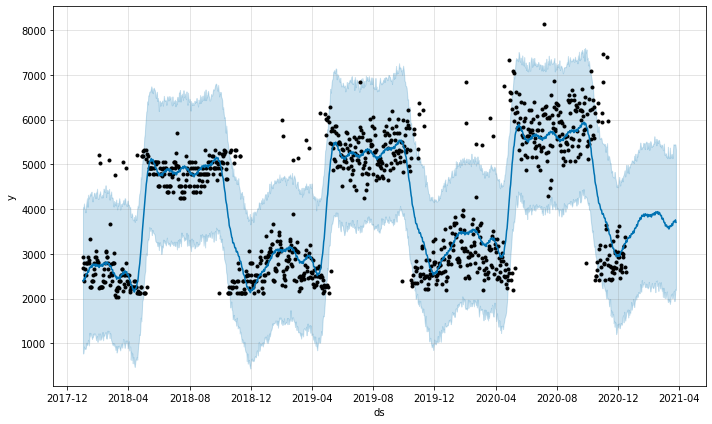

In [ ]:
plot1= m.plot(forecast)

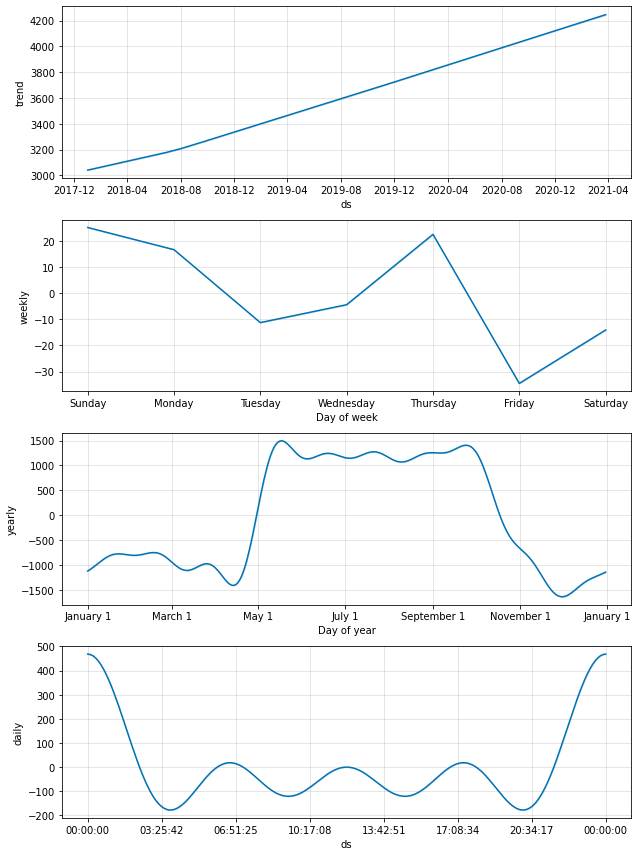

In [ ]:
plot2 = m.plot_components(forecast)